In [1]:
#import statements and image loading:
%matplotlib inline
import sys
import skimage
import os
from skimage import io
import scipy.misc as sp
import numpy as np
import matplotlib.pyplot as mpl
import math

cleese = io.imread("cleese.jpg")

In [2]:
#resize cleese image to 256 x 256
resize_cleese = sp.imresize(cleese,(256,256))
resize_cleese.shape

(256, 256, 3)

In [4]:
#make images containing only one color channel:

#initialize empty numpy arrays of the correct size
green = np.empty([256,256,3])
blue = np.empty([256,256,3])
red = np.empty([256,256,3])

#create loop control variables
i = 0
j = 0

#parse resized image pixel by pixel
for row in resize_cleese:
    j = 0
    for pixel in row:
        green[i][j] = [0, pixel[1], 0]
        blue[i][j] = [0, 0, pixel[2]]
        red[i][j] = [pixel[0], 0, 0]
        j += 1
    i += 1
    

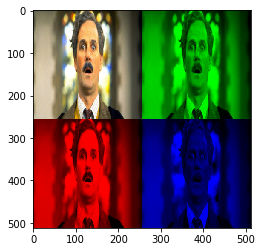

In [6]:
#create new image containing the original, and then the single color channels
cleese_final = np.empty([512, 512, 3])
for i in range(512):
    for j in range(512):
        if i < 256 and j < 256:
            cleese_final[i][j] = resize_cleese[i][j]
        elif i < 256 and j > 256:
            cleese_final[i][j] = green[i][j-256]
        elif i > 256 and j < 256:
            cleese_final[i][j] = red[i-256][j]
        else:
            cleese_final[i][j] = blue[i-256][j-256]
mpl.imshow(np.uint8(cleese_final))

(1000, 1000, 4)

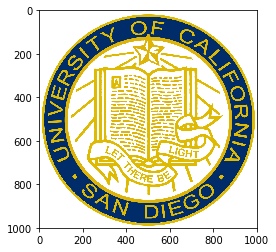

In [7]:
#Image rotation:
ucsd = io.imread("ucsd.png")
mpl.imshow(np.uint8(ucsd))

#parse the image pixel by pixel to create rotated images:
ucsd.shape

In [47]:
#image rotation function:
def rotate_image(image, angle):
    #initialize new image to empty numpy array
    size = image.shape
    new_image = np.empty([size[0],size[1],size[2]])
    for x in range(size[0]):
        for y in range(size[1]):
            newX = int(math.cos(angle)*x - math.sin(angle)*y)
            newY = int(math.sin(angle)*x + math.cos(angle)*y)
            new_image[newX][newY] = image[x][y]
    return new_image

In [48]:
img1 = rotate_image(ucsd, math.pi/2)
img2 = rotate_image(ucsd, math.pi)
img3 = rotate_image(ucsd, 3 * math.pi / 2)

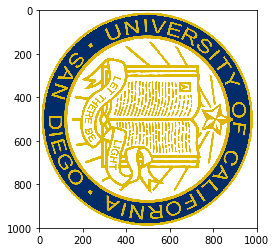

In [51]:
mpl.imshow((np.uint8(img3)))


In [30]:
#initialize empty numpy arrays of the correct size
ucsd_90 = np.empty([1000,1000,4])
ucsd_180 = np.empty([1000,1000,4])
ucsd_270 = np.empty([1000,1000,4])

#compute new images
for x in range(1000):
    for y in range(1000):
        #90 degree rotation
        newX_90 = int(math.cos(math.pi/2)*x - math.sin(math.pi/2)*y)
        newY_90 = int(math.sin(math.pi/2)*x - math.cos(math.pi/2)*y)
        ucsd_90[newX_90][newY_90] = ucsd[x][y]
        
        #180 degree rotation
        newX_180 = int(math.cos(math.pi)*x - math.sin(math.pi)*y)
        newY_180 = int(math.sin(math.pi)*x - math.cos(math.pi)*y)
        ucsd_180[newX_180][newY_180] = ucsd[x][y]
        
        #270 degree rotation
        newX_270 = int(math.cos(3*math.pi/2)*x - math.sin(3*math.pi/2)*y)
        newY_270 = int(math.sin(3*math.pi/2)*x - math.cos(3*math.pi/2)*y)
        ucsd_270[newX_270][newY_270] = ucsd[x][y]

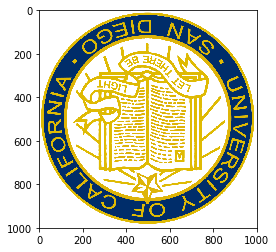

In [31]:
mirrored_180 = np.empty([1000,1000,4])
for x in range(1000):
    j = 999
    for y in range(1000):
        mirrored_180[x][y] = ucsd_180[x][j]
        j-=1
mpl.imshow((np.uint8(mirrored_180)))


180 degree rotation

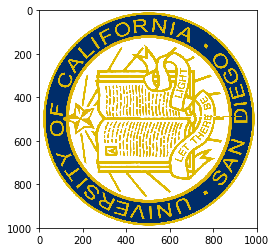

In [32]:
mpl.imshow((np.uint8(ucsd_90)))

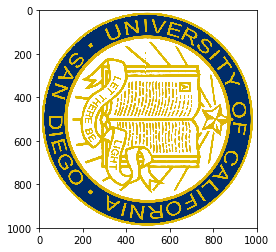

In [33]:
mpl.imshow((np.uint8(ucsd_270)))